# open parcels run and plot info

In [2]:
import os, shutil
import xarray as xr

from time import sleep
from datetime import datetime
from IPython.display import clear_output

import mitequinox.parcels as pa

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.8546926.datarmor0/parcels-55081/libparcels_random_dc8fd576-60c6-48e6-ab2b-5d4e2f5c3e8a.so


In [3]:
#root_dir = '/home1/scratch/aponte/parcels/'
#root_dir = '/home1/datawork/aponte/parcels/'
#root_dir = '/home1/datawork/slgentil/parcels/'
root_dir = "/home/datawork-lops-osi/equinox/mit4320/parcels/"

# 5x5 tiles dij=100 T=365 5jobs x 5workers
#run_name = 'global_T365j_dt1j_dij50'
#run_name = 'debug'
#run_name = 'global_extra_T365j_dt1j_dij50'
run_name = 'global_T365j_dt1j_dij50'

#run_name = "global_T6j_dt0p5j_dij50"
#run_name = "global_T6j_dt1j_dij50"

In [4]:
ds, dirs = pa.load_logs(root_dir, run_name)

In [5]:
#ds.sel(step=slice(172, None)).global_parcel_number.plot()

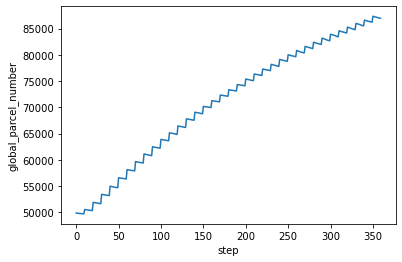

In [6]:
ds.global_parcel_number.plot()

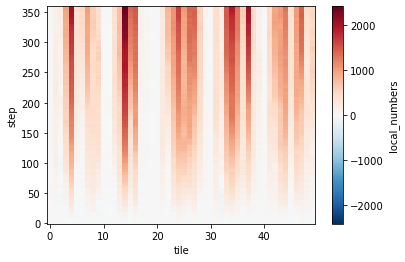

In [7]:
(ds.local_numbers - ds.local_numbers.sel(step=0)).plot()

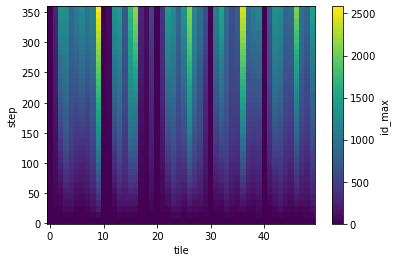

In [8]:
(ds.id_max - ds.id_max.sel(step=0)).plot()

In [9]:
def print_status(ds, delta_step=10):

    max_step = int(max(ds.step))

    print(datetime.now())
    
    for i in range(delta_step):
        step = max_step-delta_step+i
        global_previous = int(ds.global_parcel_number.sel(step=step-1))
        global_number = int(ds.global_parcel_number.sel(step=step))
        print('-- step {}'.format(step))
        print('Total number of particles = {}  ({:+d})'
          .format(global_number, 
                  global_number-global_previous,
                 )
         )

In [ ]:
while True:
    
    clear_output(wait=True)
    
    ds, dirs = pa.load_logs(root_dir, run_name)
    print_status(ds)
    
    sleep(60*5)